**Data Aggregation and Group Operations**

* Categorizar un conjunto de datos y aplicar una función a cada grupo, ya sea una agregación o una transformación, suele ser un componente fundamental del flujo de trabajo de un análisis de datos. 

* Después de cargar, fusionar y preparar un conjunto de datos, una tarea familiar es calcular estadísticas de grupo o posiblemente tablas dinámicas para fines de presentación de informes o visualización. pandas proporciona una función groupby flexible y de alto rendimiento, lo que le permite cortar y dividir, y resumir conjuntos de datos de una manera natural.

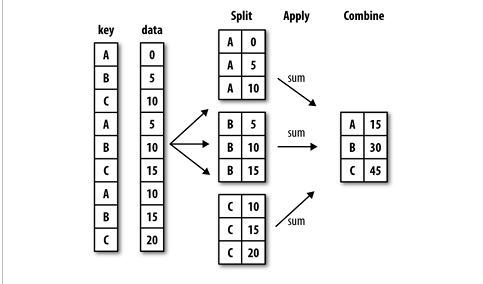

Cada clave de agrupación puede adoptar diversas formas, y no es necesario que todas las claves sean del mismo tipo:

 - Una lista o matriz de valores de la misma longitud que el eje que se está agrupando
 - Un valor que indica el nombre de una columna en un DataFrame

- Un dict o Serie que indique una correspondencia entre los valores del eje que se está agrupados y los nombres de los grupos

 - Una función que se invocará en el índice del eje o en las etiquetas individuales del índice

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})

df

,key1,key2,data1,data2
0,a,one,1.725206,-0.317392
1,a,two,-0.318905,1.236613
2,b,one,1.921945,-0.719297
3,b,two,0.031187,0.009617
4,a,one,-1.279466,-0.217865


Supongamos que desea calcular la media de la columna datos1 utilizando las etiquetas de grupo de key1. Hay varias formas de hacerlo. Una es acceder a data1 y llamar a groupby con la columna (una Serie) en clave1:

In [3]:
grouped = df["data1"].groupby(df["key1"])
grouped

 La idea es que este objeto tenga toda la información necesaria para luego aplicar alguna operación a cada uno de los grupos. Por ejemplo, para calcular las medias de los grupos podemos llamar al método de la media de GroupBy:

In [4]:
grouped.mean()

key1
a    0.042278
b    0.976566
Name: data1, dtype: float64

Más adelante explicaré más sobre lo que ocurre cuando se llama a .mean(). Lo importante aquí es que los datos (una Serie) han sido agregados según la clave de grupo,
 produciendo una nueva Serie que ahora está indexada por los valores únicos de la columna key1.

El índice resultante tiene el nombre 'clave1' porque la columna DataFrame df['key1'] lo tenía

In [5]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.222870
      two    -0.318905
b     one     1.921945
      two     0.031187
Name: data1, dtype: float64

In [6]:
means.unstack()

key2,one,two
key1,,
a,0.222870,-0.318905
b,1.921945,0.031187


 En estos ejemplos, las claves de grupo son todas Series, aunque podrían ser cualquier matriz de la longitud longitud adecuada:

In [7]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
w = df["data1"].groupby([states,years]).mean()

In [8]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.222870 -0.267628
     two  -0.318905  1.236613
b    one   1.921945 -0.719297
     two   0.031187  0.009617

In [9]:
df["data1"].groupby(df["key1"]).mean()

key1
a    0.042278
b    0.976566
Name: data1, dtype: float64

Independientemente del objetivo al utilizar groupby, un método GroupBy generalmente útil es  size que devuelve una Serie que contiene los tamaños de los grupos:

In [10]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

**Iterar sobre Grupos**

* El objeto GroupBy soporta iteración, generando una secuencia de tuplas de 2 elementos que contienen el nombre del grupo junto con el conjunto de datos correspondiente. Considera el siguiente conjunto de datos de ejemplo pequeño:

* Este bucle for recorre los grupos creados al agrupar df por la columna key1.

* group será un DataFrame que contiene solo las filas correspondientes a ese grupo.

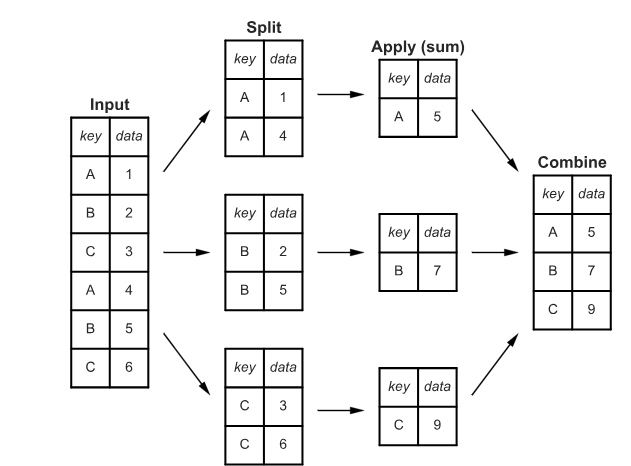

In [11]:
for key, group in df.groupby(df['key1']):
    print(key)
    print(group)

a
  key1 key2     data1     data2
0    a  one  1.725206 -0.317392
1    a  two -0.318905  1.236613
4    a  one -1.279466 -0.217865
b
  key1 key2     data1     data2
2    b  one  1.921945 -0.719297
3    b  two  0.031187  0.009617


En el caso de múltiples claves, el primer elemento en la tupla será una tupla de valores de clave:

In [12]:
for (k1, k2), group in df.groupby(['key1','key2']):
    print(k1,k2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one  1.725206 -0.317392
4    a  one -1.279466 -0.217865
a two
  key1 key2     data1     data2
1    a  two -0.318905  1.236613
b one
  key1 key2     data1     data2
2    b  one  1.921945 -0.719297
b two
  key1 key2     data1     data2
3    b  two  0.031187  0.009617


Por supuesto, puedes elegir hacer lo que quieras con las piezas de datos. Una receta que puede serte útil es calcular un diccionario de las piezas de datos como una línea de código:

In [13]:
list(df.groupby('key1'))

[('a',
    key1 key2     data1     data2
  0    a  one  1.725206 -0.317392
  1    a  two -0.318905  1.236613
  4    a  one -1.279466 -0.217865),
 ('b',
    key1 key2     data1     data2
  2    b  one  1.921945 -0.719297
  3    b  two  0.031187  0.009617)]

In [14]:
pieces = dict(list(df.groupby('key1')))
pieces

{'a':   key1 key2     data1     data2
 0    a  one  1.725206 -0.317392
 1    a  two -0.318905  1.236613
 4    a  one -1.279466 -0.217865,
 'b':   key1 key2     data1     data2
 2    b  one  1.921945 -0.719297
 3    b  two  0.031187  0.009617}

In [15]:
pieces['b']

,key1,key2,data1,data2
2,b,one,1.921945,-0.719297
3,b,two,0.031187,0.009617


In [16]:
pieces['a']

,key1,key2,data1,data2
0,a,one,1.725206,-0.317392
1,a,two,-0.318905,1.236613
4,a,one,-1.279466,-0.217865


In [17]:
for key, group in pieces.items():
    print(f"Group: {key}")
    print(group['data1'])
    print()

Group: a
0    1.725206
1   -0.318905
4   -1.279466
Name: data1, dtype: float64

Group: b
2    1.921945
3    0.031187
Name: data1, dtype: float64



Por defecto, groupby agrupa en el eje axis=0, pero puedes agrupar en cualquiera de los otros ejes. Por ejemplo, podríamos agrupar las columnas de nuestro DataFrame de ejemplo aquí por tipo de dato (dtype) de la siguiente manera:




In [18]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [19]:
grouped = df.groupby(df.dtypes,axis=1)
dict(list(grouped))

C:\Users\Mike\AppData\Local\Temp\ipykernel_7364\3339404009.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  grouped = df.groupby(df.dtypes,axis=1)


{dtype('float64'):       data1     data2
 0  1.725206 -0.317392
 1 -0.318905  1.236613
 2  1.921945 -0.719297
 3  0.031187  0.009617
 4 -1.279466 -0.217865,
 dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

**Seleccionar una Columna o Subconjunto de Columnas**

* Indexar un objeto GroupBy creado a partir de un DataFrame con el nombre de una columna o un arreglo de nombres de columnas tiene el efecto de seleccionar esas columnas para la agregación. Esto significa que:

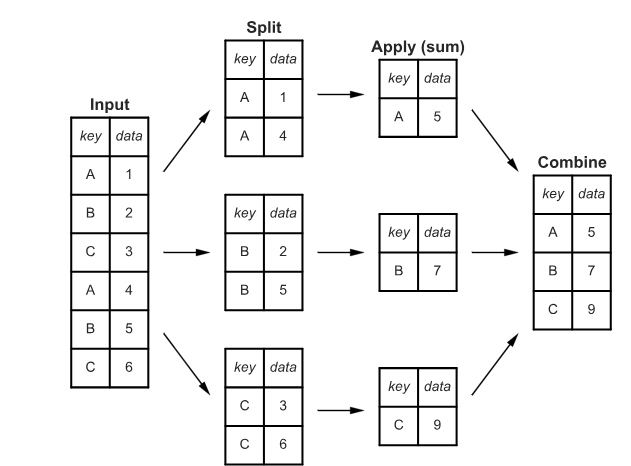

In [20]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]


Especialmente para conjuntos de datos grandes, puede ser deseable agregar solo algunas columnas. Por ejemplo, en el conjunto de datos anterior, para calcular los promedios solo para la columna data2 y obtener el resultado como un DataFrame, podríamos escribir:

In [21]:
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.267628
     two   1.236613
b    one  -0.719297
     two   0.009617

* El objeto devuelto por esta operación de indexación es un DataFrame agrupado si se pasa una lista o un arreglo, 

* y es una Serie agrupada si se pasa solo un nombre de columna como un escalar:





In [22]:
s_grouped = df.groupby(['key1', 'key2'])['data2'].mean()
s_grouped

key1  key2
a     one    -0.267628
      two     1.236613
b     one    -0.719297
      two     0.009617
Name: data2, dtype: float64

In [23]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [24]:
s_grouped.mean()

key1  key2
a     one    -0.267628
      two     1.236613
b     one    -0.719297
      two     0.009617
Name: data2, dtype: float64

**Agrupación con Diccionarios y Series**

* La información de agrupación puede existir en formas distintas a un arreglo. Consideremos otro ejemplo con un DataFrame:





In [25]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

people

,a,b,c,d,e
Joe,0.780723,0.894100,-0.448330,-0.211859,-1.024785
Steve,-0.193905,0.366678,-0.048572,-0.281020,0.229930
Wes,0.518486,-0.478191,0.017790,0.455187,-2.202889
Jim,1.060327,2.061696,0.200651,-0.623418,0.624500
Travis,0.121564,0.157293,0.596135,-0.143741,0.532136


In [26]:
#Agregando nuevos valores Na
people.loc['Wes',['b','c']] = np.NaN
people

,a,b,c,d,e
Joe,0.780723,0.894100,-0.448330,-0.211859,-1.024785
Steve,-0.193905,0.366678,-0.048572,-0.281020,0.229930
Wes,0.518486,NaN,NaN,0.455187,-2.202889
Jim,1.060327,2.061696,0.200651,-0.623418,0.624500
Travis,0.121564,0.157293,0.596135,-0.143741,0.532136


Ahora, supongamos que tengo una correspondencia de grupos para las columnas y quiero sumar las columnas por grupo:

In [27]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}
 

Ahora, podrías construir fácilmente un arreglo a partir de este diccionario para pasarlo a groupby, pero en su lugar podemos simplemente pasar el diccionario:

In [28]:
by_column = people.groupby(mapping,axis=1)
by_column.sum()

C:\Users\Mike\AppData\Local\Temp\ipykernel_7364\166300809.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  by_column = people.groupby(mapping,axis=1)


,blue,red
Joe,-0.660189,0.650038
Steve,-0.329592,0.402704
Wes,0.455187,-1.684403
Jim,-0.422767,3.746524
Travis,0.452394,0.810993


La misma funcionalidad se aplica a las Series, las cuales pueden ser vistas como un mapeo de tamaño fijo. Cuando utilicé Series como claves de grupo en los ejemplos anteriores, pandas, de hecho, inspecciona cada Serie para asegurarse de que su índice esté alineado con el eje sobre el cual está realizando la agrupación.

In [29]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [30]:
people.groupby(map_series,axis=1).count()

C:\Users\Mike\AppData\Local\Temp\ipykernel_7364\3667510483.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  people.groupby(map_series,axis=1).count()


,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


**Agrupación con Funciones**

* Utilizar funciones de Python de manera creativa es una forma más abstracta de definir un mapeo de grupos en comparación con un diccionario o una Serie. 

* Cualquier función pasada como clave de grupo será llamada una vez por cada valor de índice, y los valores de retorno se utilizarán como nombres de grupo. 

* Más concretamente, considera el DataFrame de ejemplo de la sección anterior, que tiene los nombres de las personas como valores de índice. Supongamos que deseas agrupar por la longitud de los nombres; podrías calcular un arreglo de longitudes de cadenas, pero en su lugar puedes simplemente pasar la función len:

In [31]:
people

,a,b,c,d,e
Joe,0.780723,0.894100,-0.448330,-0.211859,-1.024785
Steve,-0.193905,0.366678,-0.048572,-0.281020,0.229930
Wes,0.518486,NaN,NaN,0.455187,-2.202889
Jim,1.060327,2.061696,0.200651,-0.623418,0.624500
Travis,0.121564,0.157293,0.596135,-0.143741,0.532136


In [32]:
people.groupby(len).sum()

,a,b,c,d,e
3,2.359537,2.955796,-0.247679,-0.380090,-2.603174
5,-0.193905,0.366678,-0.048572,-0.281020,0.229930
6,0.121564,0.157293,0.596135,-0.143741,0.532136


Mezclar funciones con arreglos, diccionarios o Series no es un problema, ya que todo se convierte internamente en arreglos:

In [33]:
people

,a,b,c,d,e
Joe,0.780723,0.894100,-0.448330,-0.211859,-1.024785
Steve,-0.193905,0.366678,-0.048572,-0.281020,0.229930
Wes,0.518486,NaN,NaN,0.455187,-2.202889
Jim,1.060327,2.061696,0.200651,-0.623418,0.624500
Travis,0.121564,0.157293,0.596135,-0.143741,0.532136


In [34]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len,key_list]).min()

a         b         c         d         e
3 one  0.518486  0.894100 -0.448330 -0.211859 -2.202889
  two  1.060327  2.061696  0.200651 -0.623418  0.624500
5 one -0.193905  0.366678 -0.048572 -0.281020  0.229930
6 two  0.121564  0.157293  0.596135 -0.143741  0.532136

**Agrupación por Niveles de Índice**

* Una conveniencia final para conjuntos de datos con índices jerárquicos es la capacidad de agregar usando uno de los niveles de un índice de eje. 

* Para hacer esto, pasa el número de nivel o el nombre utilizando la palabra clave level:

In [35]:
people

,a,b,c,d,e
Joe,0.780723,0.894100,-0.448330,-0.211859,-1.024785
Steve,-0.193905,0.366678,-0.048572,-0.281020,0.229930
Wes,0.518486,NaN,NaN,0.455187,-2.202889
Jim,1.060327,2.061696,0.200651,-0.623418,0.624500
Travis,0.121564,0.157293,0.596135,-0.143741,0.532136


In [36]:
columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],
                                     [1,3,5,1,3]],
                                     names=['cty','tenor'])

In [37]:
hier_df = pd.DataFrame(np.random.randn(4,5),columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.452999  1.855436 -2.008504 -0.148188 -0.409839
1     -0.152765 -0.180896 -0.533276  0.701040 -0.595741
2     -0.910187 -1.530073 -1.825263 -0.282211  0.532906
3      0.837464  0.269308 -0.465811 -0.361530  0.106911

In [38]:
hier_df.groupby(level='cty',axis=1).count()

C:\Users\Mike\AppData\Local\Temp\ipykernel_7364\2560495854.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  hier_df.groupby(level='cty',axis=1).count()


cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [39]:
hier_df.groupby(level='tenor',axis=1).count()

C:\Users\Mike\AppData\Local\Temp\ipykernel_7364\1136820505.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  hier_df.groupby(level='tenor',axis=1).count()


tenor,1,3,5
0,2,2,1
1,2,2,1
2,2,2,1
3,2,2,1


**Agregación de Datos**

* Por "agregación", generalmente me refiero a cualquier transformación de datos que produzca valores escalares a partir de arreglos. En los ejemplos anteriores he utilizado varios de ellos, como mean (media), count (conteo), min (mínimo) y sum (suma). Puede que te preguntes qué sucede cuando invocas mean() en un objeto GroupBy. 

* Muchas de las agregaciones comunes, como las que se encuentran en la Tabla 9-1, tienen implementaciones optimizadas que calculan las estadísticas en el conjunto de datos en su lugar. Sin embargo, no estás limitado solo a este conjunto de métodos. 

* Puedes usar agregaciones que diseñes tú mismo y además llamar a cualquier método que esté definido en el objeto agrupado. Por ejemplo, como recordarás, quantile calcula los cuantiles muestrales de una Serie o de las columnas de un DataFrame

In [40]:
df

,key1,key2,data1,data2
0,a,one,1.725206,-0.317392
1,a,two,-0.318905,1.236613
2,b,one,1.921945,-0.719297
3,b,two,0.031187,0.009617
4,a,one,-1.279466,-0.217865


In [41]:
grouped = df.groupby('key1')
list(grouped)

[('a',
    key1 key2     data1     data2
  0    a  one  1.725206 -0.317392
  1    a  two -0.318905  1.236613
  4    a  one -1.279466 -0.217865),
 ('b',
    key1 key2     data1     data2
  2    b  one  1.921945 -0.719297
  3    b  two  0.031187  0.009617)]

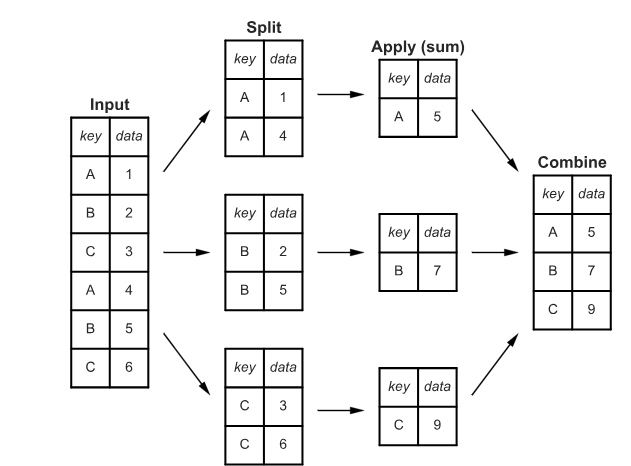

In [42]:
grouped['data1'].quantile(0.9)

key1
a    1.316384
b    1.732869
Name: data1, dtype: float64

* Aunque quantile no está implementado explícitamente para GroupBy, es un método de Series y, por lo tanto, está disponible para su uso. Internamente, GroupBy divide eficientemente la Serie, llama a piece.quantile(0.9) para cada fragmento y luego ensambla esos resultados en el objeto de resultado.

* Para usar tus propias funciones de agregación, pasa cualquier función que agregue un arreglo al método **aggregate o agg:**

In [43]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

**Filtrar los números usando np.issubdtype:**

In [44]:
w = ['j','k','y',1,2,3,4]
numbers = [x for x in w if np.issubdtype(type(x), np.number)]
numbers

[1, 2, 3, 4]

In [45]:
import numpy as np
for col in df.select_dtypes(include=np.number).columns:
    print(col)

data1
data2


In [46]:
# Aplicar la agregación solo a las columnas numéricas
result = grouped.agg({col: peak_to_peak for col in df.select_dtypes(include=np.number).columns})
print(result)

         data1     data2
key1                    
a     3.004673  1.554005
b     1.890759  0.728914


In [47]:
result.describe()

,data1,data2
count,2.000000,2.000000
mean,2.447716,1.141460
std,0.787656,0.583428
min,1.890759,0.728914
25%,2.169237,0.935187
50%,2.447716,1.141460
75%,2.726194,1.347732
max,3.004673,1.554005


Para ilustrar algunas características avanzadas de agregación, utilizaré un conjunto de datos menos trivial: un conjunto de datos sobre propinas en restaurantes. Obtuve este conjunto de datos del paquete reshape2 de R; originalmente se encontraba en el texto de estadísticas empresariales de Bryant & Smith de 1995 (y se encuentra en el repositorio de GitHub del libro). Después de cargarlo con read_csv, agregaré una columna de porcentaje de propina (tip_pct).

In [48]:
tips = pd.read_csv('../Files/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


**Aplicación de Funciones por Columna y Múltiples Funciones**

* Como has visto anteriormente, agregar una Serie o todas las columnas de un DataFrame es simplemente cuestión de usar **aggregate** con la función deseada o llamar a un método como mean o std. 

* Sin embargo, puede que desees agregar usando una función diferente según la columna o varias funciones a la vez. 

* Afortunadamente, esto es sencillo de hacer, como ilustraré a través de varios ejemplos. Primero, agruparé las propinas por sexo y fumador:

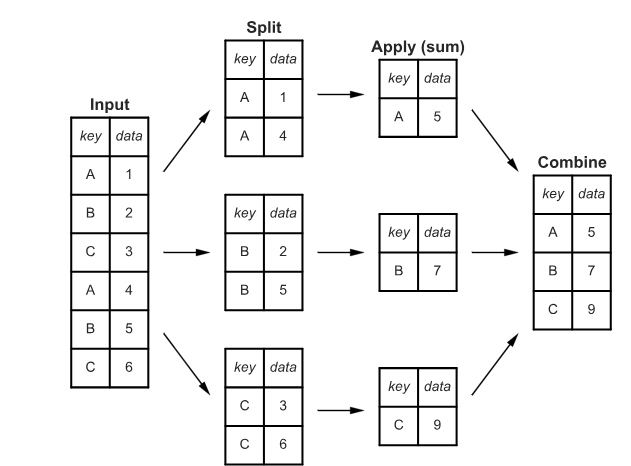

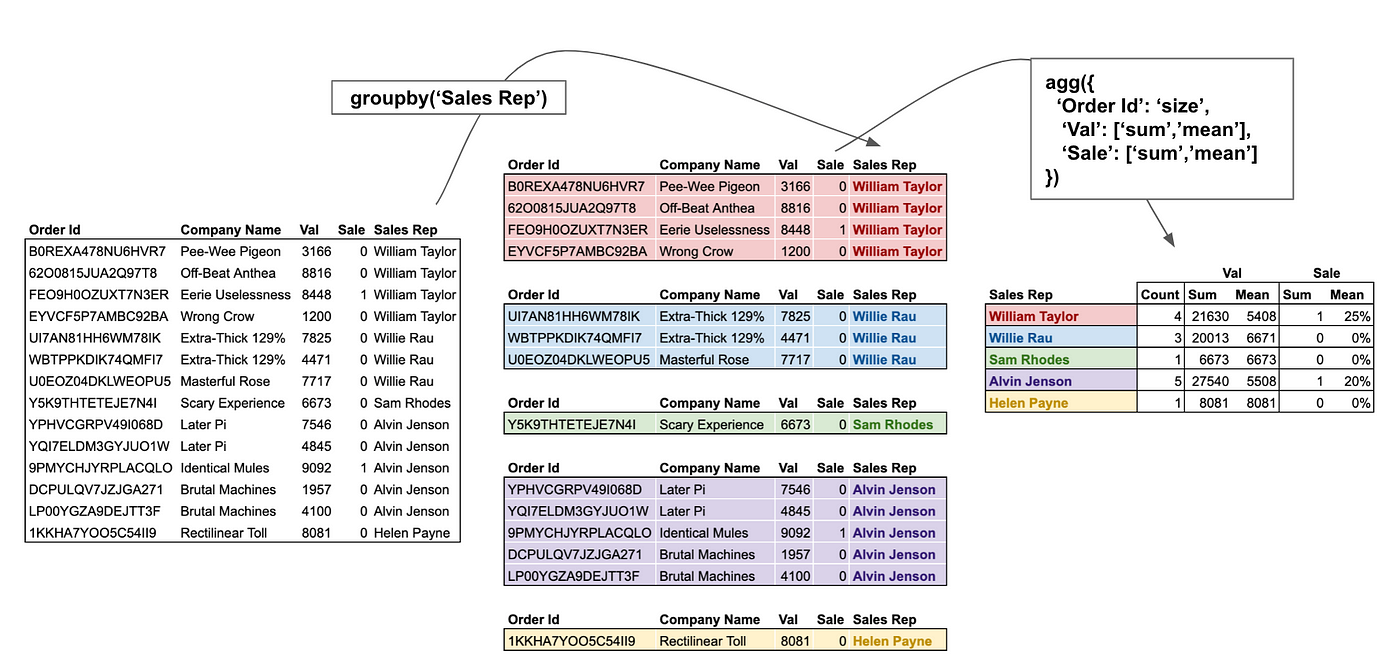

In [49]:
grouped = tips.groupby(['sex','smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

Si pasas una lista de funciones o nombres de funciones en su lugar, obtendrás un DataFrame con nombres de columna tomados de las funciones:

In [50]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [51]:
grouped_pct.agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

* No es necesario aceptar los nombres que GroupBy asigna a las columnas; notablemente, las funciones lambda tienen el nombre '**lambda**', lo que las hace difíciles de identificar (puedes verlo por ti mismo mirando el atributo name de una función). 

* Por lo tanto, si pasas una lista de tuplas (nombre, función), el primer elemento de cada tupla se utilizará como los nombres de las columnas del DataFrame (puedes pensar en una lista de 2-tuplas como un mapeo ordenado):

In [52]:
grouped_pct.agg([('foo','mean'),('bar',np.std)])

C:\Users\Mike\AppData\Local\Temp\ipykernel_7364\2886187062.py:1: FutureWarning: The provided callable <function std at 0x0000023690F5C720> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  grouped_pct.agg([('foo','mean'),('bar',np.std)])


foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

Con un DataFrame, tienes más opciones, ya que puedes especificar una lista de funciones para aplicar a todas las columnas o funciones diferentes por columna. Para comenzar, supongamos que queremos calcular las mismas tres estadísticas para las columnas tip_pct y total_bill:


In [53]:
functions = ['count','mean','max']
result = grouped[['tip_pct','total_bill']].agg(functions)
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

Como puedes ver, el DataFrame resultante tiene columnas jerárquicas, de la misma manera que obtendrías al agregar cada columna por separado y usar concat para unir los resultados, utilizando los nombres de las columnas como el argumento keys.

In [54]:
result['tip_pct']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

**Cambiando el nombre de las columnas por medio de una lista de tuplas**

In [55]:
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [56]:
ftuples = [('Promedio','mean'),('Varianza',np.var)]
grouped[['tip_pct','total_bill']].agg(ftuples)

C:\Users\Mike\AppData\Local\Temp\ipykernel_7364\2586640205.py:2: FutureWarning: The provided callable <function var at 0x0000023690F5C860> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  grouped[['tip_pct','total_bill']].agg(ftuples)


tip_pct           total_bill           
               Promedio  Varianza   Promedio   Varianza
sex    smoker                                          
Female No      0.156921  0.001327  18.105185  53.092422
       Yes     0.182150  0.005126  17.977879  84.451517
Male   No      0.160669  0.001751  19.791237  76.152961
       Yes     0.152771  0.008206  22.284500  98.244673

* Ahora, supongamos que deseas aplicar funciones potencialmente diferentes a una o más de las columnas. 

* **El truco consiste en pasar un diccionario a agg que contenga un mapeo de nombres de columna a cualquiera de las especificaciones de función mencionadas hasta ahora:**

In [57]:
grouped.agg({'tip':np.max, 'size':'sum', 'tip_pct':'mean'})

C:\Users\Mike\AppData\Local\Temp\ipykernel_7364\3925483407.py:1: FutureWarning: The provided callable <function max at 0x0000023690F43BA0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped.agg({'tip':np.max, 'size':'sum', 'tip_pct':'mean'})


tip  size   tip_pct
sex    smoker                      
Female No       5.2   140  0.156921
       Yes      6.5    74  0.182150
Male   No       9.0   263  0.160669
       Yes     10.0   150  0.152771

In [58]:
grouped.agg({'tip':np.max, 'size':'sum', 'tip_pct':'mean'})

C:\Users\Mike\AppData\Local\Temp\ipykernel_7364\3925483407.py:1: FutureWarning: The provided callable <function max at 0x0000023690F43BA0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped.agg({'tip':np.max, 'size':'sum', 'tip_pct':'mean'})


tip  size   tip_pct
sex    smoker                      
Female No       5.2   140  0.156921
       Yes      6.5    74  0.182150
Male   No       9.0   263  0.160669
       Yes     10.0   150  0.152771

In [59]:
grouped.agg({'tip_pct' : ['min','max','mean','std'], 'size':'sum'})

tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

* En todos los ejemplos hasta ahora, los datos agregados regresan con un índice, potencialmente jerárquico, compuesto por las combinaciones únicas de claves de grupo observadas. Como esto no siempre es deseable, puedes deshabilitar este comportamiento en la mayoría de los casos pasando as_index=False a groupby:

**as_index = True**

In [60]:
grouped = tips.groupby(['sex','smoker'])
grouped_pct = grouped[['total_bill','tip','size','tip_pct']]
grouped_pct.mean()

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

**as_index = False**

In [61]:
grouped = tips.groupby(['sex','smoker'], as_index=False)
grouped_unindexed = grouped[['total_bill','tip','size','tip_pct']]
grouped_unindexed.mean()

,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


Usar groupby de esta manera generalmente es menos flexible; por ejemplo, los resultados con columnas jerárquicas no están implementados actualmente, ya que la forma del resultado tendría que ser algo arbitraria.

pag 280